# Quantum Ensemble of swap-test

#### Import modules and packages

In [3]:
%matplotlib inline

from Utils import *

create_dir('output')

The directory output  already exists


#### Generate random data

In [4]:
seed = 543
np.random.seed(seed)

x1 = uniform(-10,10,2)
x2 = uniform(-10,10,2)
x_test = uniform(-10,10,2)

## Quantum Ensemble of 2 Swap-Tests

The ensemble of swap-tests aims to show that it is possible to obtain the average of the distance between a test vector $\tilde{x}$ and two training vectors $x_1$ and $x_2$. The circuit that implement the ensemble is the following:

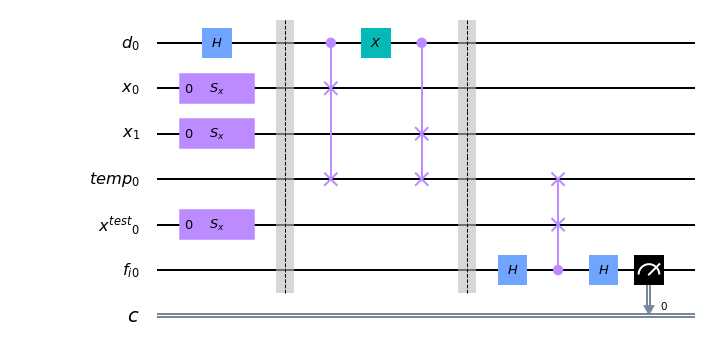

In [5]:
qc = quantum_ensemble(x1, x2, x_test)
qc.draw(output='mpl')

### Step 1: State Preparation

The vectors $x_1$, $x_2$ and $x_{test}$ are encoded in the amplitudes of three different registers. Plus, the control register is initialised into uniform superposition.

$$ \left|\Phi_1\right\rangle = \Big( H \otimes S_{x} \otimes \mathbb{1} \otimes S_{\tilde{x}} \otimes \mathbb{1}   \Big) \left|\Phi_0\right\rangle 
= 
\frac{1}{\sqrt{2}}\big( \left|0\right\rangle + \left|1\right\rangle \big) \otimes \left|x_1, x_2\right\rangle \otimes \left|\phi\right\rangle  \otimes\left|\tilde{x}\right\rangle \left|0\right\rangle$$

where $S_x$ is the routine which encodes in the amplitudes of a qubit a real vector $x$ and $H$ is the Hadamard transformation.


### Step 2: Sampling in Superposition

Fistr a c-Swap is performed, where the swapped qubit are $\left|x_1\right\rangle$ and $\left| \phi \right\rangle$ ($temp$):

$$\left|\Phi_{1.1}\right\rangle = \frac{1}{\sqrt{2}}\big( 
\left|0\right\rangle \left|x_1, x_2\right\rangle \left|\phi\right\rangle  \left|\tilde{x}\right\rangle \left|0\right\rangle 
+
\left|1\right\rangle \left|\phi, x_2\right\rangle \left|x_1\right\rangle \left|\tilde{x}\right\rangle \left|0\right\rangle
\big)$$

Then the $Pauli-X$ gate is applied to the $control$ qubit:

$$\left|\Phi_{1.2}\right\rangle = \frac{1}{\sqrt{2}}\big( 
\left|1\right\rangle \left|x_1, x_2\right\rangle \left|\phi\right\rangle  \left|\tilde{x}\right\rangle \left|0\right\rangle 
+
\left|0\right\rangle \left|\phi, x_2\right\rangle \left|x_1\right\rangle \left|\tilde{x}\right\rangle \left|0\right\rangle
\big)$$

Finally, another c-Swap is performed, this time the swapped qubit are $\left|x_2\right\rangle$ and $\left| \phi \right\rangle$:
$$\left|\Phi_{2}\right\rangle = \frac{1}{\sqrt{2}}\big( 
\left|1\right\rangle \left|x_1, \phi\right\rangle \left|x_2\right\rangle  \left|\tilde{x}\right\rangle \left|0\right\rangle 
+
\left|0\right\rangle \left|\phi, x_2\right\rangle \left|x_1\right\rangle \left|\tilde{x}\right\rangle \left|0\right\rangle
\big)$$

At this point the $temp$ register is entangled with the $control$ register and stores the vectors $x_1$ and $x_2$.

### Step 3: Classification

The $temp$ register is given as input to the swap-test, together with test register. The C gate represents the swap test, which acts on the $temp$ and $test$ registers and stores the results in the $target$ register:

$$\left|\Phi_{3}\right\rangle = \Big( \mathbb{1} \otimes \mathbb{1} \otimes C \Big)\left|\Phi_{2}\right\rangle$$


$$\left|\Phi_{3}\right\rangle = \frac{1}{\sqrt{2}}\big( 
\left|1\right\rangle\left|x_1, \phi\right\rangle C \left|x_2\right\rangle  \left|\tilde{x}\right\rangle \left|0\right\rangle 
+
\left|0\right\rangle \left|\phi, x_2\right\rangle C \left|x_1\right\rangle \left|\tilde{x}\right\rangle \left|0\right\rangle
\big)$$

$$\left|\Phi_{3}\right\rangle = \frac{1}{\sqrt{2}}\big( 
\left|1\right\rangle\left|x_1, \phi\right\rangle \left|x_2\right\rangle  \left|\tilde{x}\right\rangle \left|f_2\right\rangle 
+
\left|0\right\rangle \left|\phi, x_2\right\rangle \left|x_1\right\rangle \left|\tilde{x}\right\rangle \left|f_1\right\rangle
\big)$$

where $f_1$ and $f_2$ measure how much $\tilde{x}$ differs from $x_1$ and $x_2$, according to the swap-test. Thus, measuring the last qubit leads to the average between $f_1$ and $f_2$.

In [19]:
# Swap test using x1 as training on simulator
qc = quantum_ensemble(x1, x2, x_test)
measurement = exec_simulator(qc)
results = retrieve_proba(measurement)

In [21]:
print('The average probability which measure the distance of the test from $x_1$ and $x_2$ is:', results[0])

The average probability which measure the distance of the test from $x_1$ and $x_2$ is: 0.7598876953125


In [22]:
print('The same probability computed classically is:', classic_ensemble(x1, x2, x_test))

The same probability computed classically is: 0.7663755166282329
